In [2]:
#Import dependencies

import pandas as pd
import sqlite3
from textblob import TextBlob
import matplotlib.pyplot as plt


In [3]:
#Connect to the Bible DB

conn = sqlite3.connect("bible-sqlite.db")
cur = conn.cursor()

In [98]:
# Accessing DB meta-data

# Table column names in order: id, b, c, v , t 

for row in cur.execute('SELECT * FROM bible_version_key;'):
    print(row[1])

t_asv
t_bbe
t_dby
t_kjv
t_wbt
t_web
t_ylt


In [88]:
#for row in cur.execute('select distinct(b) from t_kjv;'):
 #   print(row)

In [4]:
for row in cur.execute('SELECT * FROM t_kjv;'):
    print(row)

(1001001, 1, 1, 1, 'In the beginning God created the heaven and the earth.')
(1001002, 1, 1, 2, 'And the earth was without form, and void; and darkness was upon the face of the deep. And the Spirit of God moved upon the face of the waters.')
(1001003, 1, 1, 3, 'And God said, Let there be light: and there was light.')
(1001004, 1, 1, 4, 'And God saw the light, that it was good: and God divided the light from the darkness.')
(1001005, 1, 1, 5, 'And God called the light Day, and the darkness he called Night. And the evening and the morning were the first day.')
(1001006, 1, 1, 6, 'And God said, Let there be a firmament in the midst of the waters, and let it divide the waters from the waters.')
(1001007, 1, 1, 7, 'And God made the firmament, and divided the waters which were under the firmament from the waters which were above the firmament: and it was so.')
(1001008, 1, 1, 8, 'And God called the firmament Heaven. And the evening and the morning were the second day.')
(1001009, 1, 1, 9, 'A

KeyboardInterrupt: 

In [4]:
#Accessing all lines from King James Bible

king_james_query = cur.execute('Select t from t_kjv')
king_james_list = []

counter = 0

for row in king_james_query:
    king_james_list.append(row[0])
    counter += 1
    if counter == 100:
        break
    

In [11]:
#Accessing all lines from American Standard Bible

american_standard_query = cur.execute('Select t from t_asv')
american_standard_list = []

counter = 0

for row in american_standard_query:
    american_standard_list.append(row[0])
    counter += 1
    if counter == 100:
        break
    

In [42]:
#Sentiment Analysis for King James using TextBlob for each line
    # Un-needed
    
king_james_sentiment = []

for row in king_james_list:
    king_james_blob = TextBlob(row)
    king_james_sentiment.append(king_james_blob.sentiment)

In [43]:
#Sentiment Analysis for American Standard using TextBlob for each line
    #Un-needed

american_standard_sentiment = []

for row in american_standard_list:
    a_s_blob = TextBlob(row)
    american_standard_sentiment.append(a_s_blob.sentiment)

In [14]:
# Structuring data for King James Bible -- Genesis 

big_query = cur.execute('Select * from t_kjv where id between 01001001 and 01999999;')

full_id = []
book = []
chapter = []
verse = []
text = []
polarity = []
subjective = []

for q in big_query:

    full_id.append(q[0])
    book.append(q[1])
    chapter.append(q[2])
    verse.append(q[3])
    text.append(q[4])

    sent = TextBlob(q[4])
    polarity.append(sent.sentiment[0])
    subjective.append(sent.sentiment[1])

# Creating the King James pandas dataframe

data = {"full_id": full_id, "book_title": book, "chapter_#": chapter, "verse": verse, "text": text, "polarity": polarity, "subjective": subjective}
king_james_genesis = pd.DataFrame(data=data)
king_james_genesis.head()

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.4)
Sentiment(polarity=0.4, subjectivity=0.7)
Sentiment(polarity=0.5, subjectivity=0.6666666666666666)
Sentiment(polarity=0.325, subjectivity=0.5166666666666666)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.1)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.06666666666666665, subjectivity=0.6)
Sentiment(polarity=0.31666666666666665, subjectivity=0.6000000000000001)
Sentiment(polarity=0.6, subjectivity=0.9)
Sentiment(polarity=0.6333333333333333, subjectivity=0.8000000000000002)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.4, subjectivity=0.7)
Sentiment(polarity=0.42000000000000004, subjectivity=0.6300000000000001)
Sentiment(polarity=0.4, subjectivity=0.7)
Sentiment(polarity=0.55, subjectivity=0.65)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.35, subjectivity=0.6125)
Sentiment(pol

,full_id,book_title,chapter_#,verse,text,polarity,subjective
0,1001001,1,1,1,In the beginning God created the heaven and th...,0.000,0.000000
1,1001002,1,1,2,"And the earth was without form, and void; and ...",0.000,0.400000
2,1001003,1,1,3,"And God said, Let there be light: and there wa...",0.400,0.700000
3,1001004,1,1,4,"And God saw the light, that it was good: and G...",0.500,0.666667
4,1001005,1,1,5,"And God called the light Day, and the darkness...",0.325,0.516667


In [15]:
# Error Checking 
    # Un-needed

print(len(full_id), len(book), len(chapter), len(verse), len(text), len(polarity), len(subjective))

1533 1533 1533 1533 1533 1533 1533


In [62]:
# Structuring data for American Standard -- Genesis Book

big_query = cur.execute('Select * from t_asv where id between 01001001 and 01999999;')

full_id = []
book = []
chapter = []
verse = []
text = []
polarity = []
subjective = []

for q in big_query:
    
    full_id.append(q[0])
    book.append(q[1])
    chapter.append(q[2])
    verse.append(q[3])
    text.append(q[4])

    sent = TextBlob(q[4])
    polarity.append(sent.sentiment[0])
    subjective.append(sent.sentiment[1])


# Creating the American Standard pandas dataframe

data = {"full_id": full_id, "book_title": book, "chapter_#": chapter, "verse": verse, "text": text, "polarity": polarity, "subjective": subjective}
american_standard_genesis = pd.DataFrame(data=data)
american_standard_genesis.head()

,full_id,book_title,chapter_#,verse,text,polarity,subjective
0,1001001,1,1,1,In the beginning God created the heavens and t...,0.0,0.000000
1,1001002,1,1,2,And the earth was waste and void; and darkness...,-0.1,0.200000
2,1001003,1,1,3,"And God said, Let there be light: and there wa...",0.4,0.700000
3,1001004,1,1,4,"And God saw the light, that it was good: and G...",0.5,0.666667
4,1001005,1,1,5,"And God called the light Day, and the darkness...",0.4,0.700000


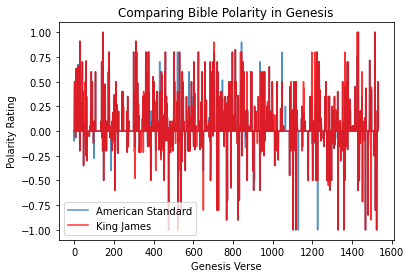

In [76]:
# Comparing the polarity of King James and American Standard Geneis verse

plt.plot(american_standard_genesis.index, american_standard_genesis['polarity'], alpha=0.8, label='American Standard')
plt.plot(king_james_genesis.index, king_james_genesis['polarity'], color='red', alpha=0.8, label='King James')
plt.title('Comparing Bible Polarity in Genesis')
plt.xlabel('Genesis Verse')
plt.ylabel('Polarity Rating')
plt.legend()
plt.show()

In [94]:
# Structuring data for King James Bible -- First book of New Testament - Matthew 

big_query = cur.execute('Select * from t_kjv where id between 39001001 and 40000000;')

full_id = []
book = []
chapter = []
verse = []
text = []
polarity = []
subjective = []

for q in big_query:
    
    full_id.append(q[0])
    book.append(q[1])
    chapter.append(q[2])
    verse.append(q[3])
    text.append(q[4])

    sent = TextBlob(q[4])
    polarity.append(sent.sentiment[0])
    subjective.append(sent.sentiment[1])

# Creating the King James pandas dataframe

data = {"full_id": full_id, "book_title": book, "chapter_#": chapter, "verse": verse, "text": text, "polarity": polarity, "subjective": subjective}
king_james_matthew = pd.DataFrame(data=data)
king_james_matthew.head()

,full_id,book_title,chapter_#,verse,text,polarity,subjective
0,39001001,39,1,1,The burden of the word of the LORD to Israel b...,0.000000,0.000000
1,39001002,39,1,2,"I have loved you, saith the LORD. Yet ye say, ...",0.700000,0.800000
2,39001003,39,1,3,"And I hated Esau, and laid his mountains and h...",-0.550000,0.350000
3,39001004,39,1,4,"Whereas Edom saith, We are impoverished, but w...",-0.155556,0.288889
4,39001005,39,1,5,"And your eyes shall see, and ye shall say, The...",0.000000,0.000000


In [95]:
# Structuring data for American Standard Bible -- First book of New Testament - Matthew 

big_query = cur.execute('Select * from t_asv where id between 39001001 and 40000000;')

full_id = []
book = []
chapter = []
verse = []
text = []
polarity = []
subjective = []

for q in big_query:
    
    full_id.append(q[0])
    book.append(q[1])
    chapter.append(q[2])
    verse.append(q[3])
    text.append(q[4])

    sent = TextBlob(q[4])
    polarity.append(sent.sentiment[0])
    subjective.append(sent.sentiment[1])

# Creating the King James pandas dataframe

data = {"full_id": full_id, "book_title": book, "chapter_#": chapter, "verse": verse, "text": text, "polarity": polarity, "subjective": subjective}
american_standard_matthew = pd.DataFrame(data=data)
american_standard_matthew.head()

,full_id,book_title,chapter_#,verse,text,polarity,subjective
0,39001001,39,1,1,The burden of the word of Jehovah to Israel by...,0.00000,0.000000
1,39001002,39,1,2,"I have loved you, saith Jehovah. Yet ye say, W...",0.70000,0.800000
2,39001003,39,1,3,"but Esau I hated, and made his mountains a des...",-0.90000,0.700000
3,39001004,39,1,4,"Whereas Edom saith, We are beaten down, but we...",-0.17037,0.192593
4,39001005,39,1,5,"And your eyes shall see, and ye shall say, Jeh...",0.00000,0.000000


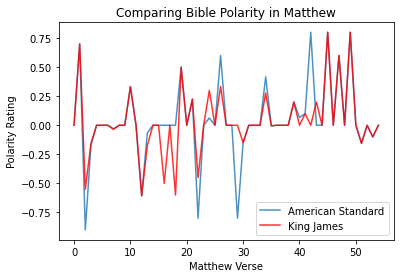

In [96]:
# Comparing the polarity of King James and American Standard Matthew verse

plt.plot(american_standard_matthew.index, american_standard_matthew['polarity'], alpha=0.8, label='American Standard')
plt.plot(king_james_matthew.index, king_james_matthew['polarity'], color='red', alpha=0.8, label='King James')
plt.title('Comparing Bible Polarity in Matthew')
plt.xlabel('Matthew Verse')
plt.ylabel('Polarity Rating')
plt.legend()
plt.show()

In [110]:
# Looking at the phrase with significant difference

print(king_james_matthew.iloc[29, 4], king_james_matthew.iloc[29, 5])
print(american_standard_matthew.iloc[29, 4], american_standard_matthew.iloc[29, 5])

For the LORD, the God of Israel, saith that he hateth putting away: for one covereth violence with his garment, saith the LORD of hosts: therefore take heed to your spirit, that ye deal not treacherously. 0.0
For I hate putting away, saith Jehovah, the God of Israel, and him that covereth his garment with violence, saith Jehovah of hosts: therefore take heed to your spirit, that ye deal not treacherously. -0.8


In [5]:
# Writing out entire Key Value pairings for all old testament chapters in Bible

bible_list = {"t_asv", "t_bbe", "t_dby", "t_kjv", "t_wbt", "t_web", "t_ylt"}

old_testament_chapter_list = {"Genesis": "01001001 and 01999999", "Exodus": "02001001 and 02999999", "Leviticus": "03001001 and 03999999", "Numbers": "04001001 and 04999999", "Deuteronomy": "05001001 and 05999999", "Joshua": "06001001 and 07999999", "Judges": "07001001 and 07999999", "Ruth": "08001001 and 08999999", "Samuel 1": "09001001 and 09999999", "Samuel 2": "10001001 and 10999999", "Kings 1": "11001001 and 11999999","Kings 2": "12001001 and 12999999", "Chronicles 1": "13001001 and 13999999", "Ezra": "14001001 and 14999999", "Nehemiah": "15001001 and 15999999", "Esther": "16001001 and 16999999", "Job": "17001001 and 17999999", "Psalms": "18001001 and 18999999", "Proverbs": "19001001 and 19999999", "Ecclesiastes": "20001001 and 20999999", "Song_of_Solomon": "21001001 and 21999999", "Isaiah": "22001001 and 22999999", "Jeremiah": "23001001 and 23999999", "Lamentations": "24001001 and 24999999", "Ezekiel": "25001001 and 25999999", "Daniel": "26001001 and 26999999", "Hosea": "27001001 and 27999999", "Joel": "28001001 and 28999999", "Amos": "29001001 and 29999999", "Obadiah": "30001001 and 30999999", "Jonah": "31001001 and 31999999", "Micah": "32001001 and 32999999", "Nahum": "33001001 and 33999999", "Habakkuk": "34001001 and 34999999", "Zephaniah": "35001001 and 35999999", "Haggai": "36001001 and 36999999", "Zechariah": "37001001 and 37999999", "Malachi": "38001001 and 38999999"}

old_testament_big_df = {}
old_test_index = []


for x in range(len(old_testament_chapter_list)):
    old_test_index.append(x)


In [6]:
# Complicated Dictionary creation

for x in bible_list:
    old_testament_big_df[x] = {}
    for y in old_testament_chapter_list:
        old_testament_big_df[x].update({y: {"polarity": [], "subjective": [] }})

In [ ]:
# Writing out Key Value pairings for new testament chapters in Bible

new_testament_chapter_list = {"Matthew": "39001001 and 39999999", "Mark": "40001001 and 40999999", "Luke": "41001001 and 41999999", "John": "42001001 and 42999999", "Acts": "43001001 and 43999999", "Romans": "44001001 and 44999999", "Corinthians 1": "45001001 and 45999999", "Corinthians 2": "46001001 and 46999999", "Galatians": "47001001 and 47999999", "Ephesians": "48001001 and 48999999", "Philippians": "49001001 and 49999999", "Colossians": "50001001 and 50999999", "Thessalonians 1": "51001001 and 51999999", "Thessalonians 2": "52001001 and 52999999", "Timothy 1": "53001001 and 53999999", "Timothy 2": "54001001 and 54999999", "Titus": "55001001 and 55999999", "Philomen": "56001001 and 56999999", "Hebrews": "57001001 and 57999999", "James": "58001001 and 58999999", "Peter 1": "59001001 and 59999999", "Peter 2": "60001001 and 60999999", "John 1": "61001001 and 61999999", "John 2": "62001001 and 62999999", "John 3": "63001001 and 63999999", "Jude": "64001001 and 64999999", "Revelation": "65001001 and 65999999"}

new_testament_big_df = {}

In [ ]:
# Complicated Dictionary creation

for x in bible_list:
    new_testament_big_df[x] = {}
    for y in new_testament_chapter_list:
        new_testament_big_df[x].update({y: {"polarity": [], "subjective": [] }})

In [7]:
print(old_testament_big_df['t_dby']['Genesis']['polarity'])

[]


In [10]:
# For Loop through every chapter of every bible in the Old Testament

old_testament_polarity = []
old_testament_subjective = []

for x in bible_list:
    for y in old_testament_chapter_list:      
        
        query = (f'Select t from {x} where id between {old_testament_chapter_list[y]};')
        sqlite_object = cur.execute(query)
        
        for sql in sqlite_object:
             sent = TextBlob(sql[0])
             old_testament_polarity.append(sent.sentiment[0])
             old_testament_subjective.append(sent.sentiment[1])
    
             old_testament_big_df[x][y]['polarity'].append(old_testament_polarity)
             old_testament_big_df[x][y]['subjective'].append(old_testament_subjective)




In the beginning God created the heaven and the earth.
And the earth was without form, and void; and darkness was upon the face of the deep: and the Spirit of God moved upon the face of the waters.
And God said, Let there be light: and there was light.
And God saw the light, that it was good: and God divided the light from the darkness.
And God called the light Day, and the darkness he called Night: and the evening and the morning were the first day.
And God said, Let there be a firmament in the midst of the waters, and let it divide the waters from the waters.
And God made the firmament; and divided the waters which were under the firmament from the waters which were above the firmament: and it was so.
And God called the firmament Heaven: and the evening and the morning were the second day.
And God said, Let the waters under the heaven be gathered into one place, and let the dry land appear: and it was so.
And God called the dry land Earth, and the collection of waters he called Seas:

KeyboardInterrupt: 